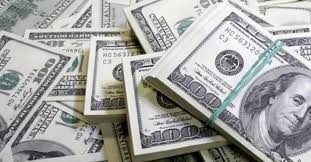

In [1]:
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
# realizando chamada do site

response = requests.get('https://www.infomoney.com.br/carreira/gestao-e-lideranca/noticia/7968899/as-20-pessoas-mais-ricas-do-mundo-segundo-a-forbes-')
print(response.text[0:500])

<!doctype html>
<html class="no-js" lang="pt-br">
<head>
 <title>As 20 pessoas mais ricas do mundo, segundo a Forbes   - InfoMoney</title>
<meta charset="utf-8" />
<link rel="dns-prefetch" href="//facebook.com" />
<link rel="dns-prefetch" href="//fbcdn-profile-a.akamaihd.net" />
<link rel="dns-prefetch" href="//images.infomoney.com.br" />
<link rel="dns-prefetch" href="//media.infomoney.com.br" />
<link rel="dns-prefetch" href="//tailtarget.com" />
<link rel="dns-prefetch" href="//www.googletagm


In [4]:
# atribuindo conteúdo para uma variável

soup = BeautifulSoup(response.text,'html.parser')

In [5]:
# interagindo com todas as <table> do projeto

all_table = soup.find_all('table')

In [6]:
# interagindo apenas com a parte significativa do projeto <table>

table = soup.find('table', {'style':'border-collapse: collapse; width: 96.8295%; height: 928px;'})

In [7]:
# entendendo quantos elementos <td> temos

results = soup.find_all('td')
print('Quantidade de elemento <td> existente na árvore: {0} unidades.' .format(len(results)))

Quantidade de elemento <td> existente na árvore: 42 unidades.


In [8]:
# entendendo a estrutura da combinação dos elementos <td>

results[0:4]

[<td style="width: 41.4021%; height: 41px;"><strong>Nome </strong></td>,
 <td style="width: 33.5979%; height: 41px;"><strong>Patrimônio </strong></td>,
 <td style="width: 41.4021%; height: 40px;">1. Jeff Bezos, dono da Amazon</td>,
 <td style="width: 33.5979%; height: 40px;">US$ 131 bilhões </td>]

In [9]:
# buscando todos o elementos <tr>

table.findAll('tr')[:5]

[<tr style="height: 41px;">
 <td style="width: 41.4021%; height: 41px;"><strong>Nome </strong></td>
 <td style="width: 33.5979%; height: 41px;"><strong>Patrimônio </strong></td>
 </tr>, <tr style="height: 40px;">
 <td style="width: 41.4021%; height: 40px;">1. Jeff Bezos, dono da Amazon</td>
 <td style="width: 33.5979%; height: 40px;">US$ 131 bilhões </td>
 </tr>, <tr style="height: 40px;">
 <td style="width: 41.4021%; height: 40px;">2. Bill Gates, dono da Microsoft </td>
 <td style="width: 33.5979%; height: 40px;">US$ 96,5 bilhões </td>
 </tr>, <tr style="height: 40px;">
 <td style="width: 41.4021%; height: 40px;">3. Warren Buffett, investidor </td>
 <td style="width: 33.5979%; height: 40px;">US$ 82,5 bilhões </td>
 </tr>, <tr style="height: 40px;">
 <td style="width: 41.4021%; height: 40px;">4. Bernard Arnault, presidente do grupo LVMH (Louis Vuitton e Sephora) </td>
 <td style="width: 33.5979%; height: 40px;">US$ 76 bilhões </td>
 </tr>]

In [10]:
# inserindo o conteúdo do site dentro das listas: nome e patrimonio

nome = []
patrimonio = []

for row in table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==2:
        nome.append(cells[0].find(text=True))
        patrimonio.append(cells[1].find(text=True))

In [11]:
# transformando em DataFrame os conteúdos das listas

import pandas as pd
df=pd.DataFrame(nome,columns=['name'])
df['patrimony']=patrimonio
df

,name,patrimony
0,Nome,Patrimônio
1,"1. Jeff Bezos, dono da Amazon",US$ 131 bilhões
2,"2. Bill Gates, dono da Microsoft","US$ 96,5 bilhões"
3,"3. Warren Buffett, investidor","US$ 82,5 bilhões"
4,"4. Bernard Arnault, presidente do grupo LVMH (...",US$ 76 bilhões
5,"5. Carlos Slim, dono da America Movil (control...",US$ 64 bilhões
6,"6. Amancio Ortega, dono da Zara","US$ 62,7 bilhões"
7,"7. Larry Ellison, co-fundador da Oracle","US$ 62,5 bilhões"
8,"8. Mark Zuckerberg, CEO do Facebook","US$ 62,3 bilhões"
9,"9. Michael Bloomberg, fundador da agência Bloo...","US$ 55,5 bilhões"


In [12]:
# a coluna name possui informações como nome e ocupação. 
# Logo, usando a virgula iremos separá-las em duas colunas: name e employment

divisao = df['name'].str.split(',')
df['name'] = divisao.str.get(0)
df['employment'] = divisao.str.get(1)
df

,name,patrimony,employment
0,Nome,Patrimônio,NaN
1,1. Jeff Bezos,US$ 131 bilhões,dono da Amazon
2,2. Bill Gates,"US$ 96,5 bilhões",dono da Microsoft
3,3. Warren Buffett,"US$ 82,5 bilhões",investidor
4,4. Bernard Arnault,US$ 76 bilhões,presidente do grupo LVMH (Louis Vuitton e Sep...
5,5. Carlos Slim,US$ 64 bilhões,dono da America Movil (controladora da Claro ...
6,6. Amancio Ortega,"US$ 62,7 bilhões",dono da Zara
7,7. Larry Ellison,"US$ 62,5 bilhões",co-fundador da Oracle
8,8. Mark Zuckerberg,"US$ 62,3 bilhões",CEO do Facebook
9,9. Michael Bloomberg,"US$ 55,5 bilhões",fundador da agência Bloomberg


In [13]:
# iremos separar a coluna patrimony em 3 colunas distintas: uss, number e qtd 

patrimonio = df['patrimony'].str.split(' ')
df['uss'] = patrimonio.str.get(0)
df['number'] = patrimonio.str.get(1)
df['qtd'] = patrimonio.str.get(2)
df

,name,patrimony,employment,uss,number,qtd
0,Nome,Patrimônio,NaN,Patrimônio,NaN,NaN
1,1. Jeff Bezos,US$ 131 bilhões,dono da Amazon,US$,131,bilhões
2,2. Bill Gates,"US$ 96,5 bilhões",dono da Microsoft,US$,"96,5",bilhões
3,3. Warren Buffett,"US$ 82,5 bilhões",investidor,US$,"82,5",bilhões
4,4. Bernard Arnault,US$ 76 bilhões,presidente do grupo LVMH (Louis Vuitton e Sep...,US$,76,bilhões
5,5. Carlos Slim,US$ 64 bilhões,dono da America Movil (controladora da Claro ...,US$,64,bilhões
6,6. Amancio Ortega,"US$ 62,7 bilhões",dono da Zara,US$,"62,7",bilhões
7,7. Larry Ellison,"US$ 62,5 bilhões",co-fundador da Oracle,US$,"62,5",bilhões
8,8. Mark Zuckerberg,"US$ 62,3 bilhões",CEO do Facebook,US$,"62,3",bilhões
9,9. Michael Bloomberg,"US$ 55,5 bilhões",fundador da agência Bloomberg,US$,"55,5",bilhões


In [14]:
# excluindo a antiga coluna patrimony

df.drop('patrimony', axis = 1, inplace = True)

# excluindo a primeira linha

df.drop(0, inplace = True)
df

,name,employment,uss,number,qtd
1,1. Jeff Bezos,dono da Amazon,US$,131,bilhões
2,2. Bill Gates,dono da Microsoft,US$,"96,5",bilhões
3,3. Warren Buffett,investidor,US$,"82,5",bilhões
4,4. Bernard Arnault,presidente do grupo LVMH (Louis Vuitton e Sep...,US$,76,bilhões
5,5. Carlos Slim,dono da America Movil (controladora da Claro ...,US$,64,bilhões
6,6. Amancio Ortega,dono da Zara,US$,"62,7",bilhões
7,7. Larry Ellison,co-fundador da Oracle,US$,"62,5",bilhões
8,8. Mark Zuckerberg,CEO do Facebook,US$,"62,3",bilhões
9,9. Michael Bloomberg,fundador da agência Bloomberg,US$,"55,5",bilhões
10,10. Larry Page,co-fundador do Google,US$,"50,8",bilhões


In [15]:
# descobrindo o tipo de cada coluna

df.dtypes

name          object
employment    object
uss           object
number        object
qtd           object
dtype: object

In [16]:
# para trabalharmos com números temos que converter a coluna number dê object para float

df['number'] = df["number"].str.replace(',', ".").astype(float)
df

,name,employment,uss,number,qtd
1,1. Jeff Bezos,dono da Amazon,US$,131.0,bilhões
2,2. Bill Gates,dono da Microsoft,US$,96.5,bilhões
3,3. Warren Buffett,investidor,US$,82.5,bilhões
4,4. Bernard Arnault,presidente do grupo LVMH (Louis Vuitton e Sep...,US$,76.0,bilhões
5,5. Carlos Slim,dono da America Movil (controladora da Claro ...,US$,64.0,bilhões
6,6. Amancio Ortega,dono da Zara,US$,62.7,bilhões
7,7. Larry Ellison,co-fundador da Oracle,US$,62.5,bilhões
8,8. Mark Zuckerberg,CEO do Facebook,US$,62.3,bilhões
9,9. Michael Bloomberg,fundador da agência Bloomberg,US$,55.5,bilhões
10,10. Larry Page,co-fundador do Google,US$,50.8,bilhões


In [17]:
# inserindo informações em uma variável

df_estatistico = round(df.describe(), 2)
df_estatistico

,number
count,20.00
mean,60.36
std,22.13
min,38.80
25%,48.12
50%,50.65
75%,63.03
max,131.00


In [18]:
trace1 = go.Bar(x = df['name'],
                y = df['number']
               )
data = [trace1]
py.iplot(data)

In [19]:
data = [go.Scatter(x=df['name'],
                   y=df['number']
                  )
       ]
py.iplot(data)

In [20]:
# salvando informações
df.to_csv('rich_20.csv')
df_estatistico.to_csv('rich_20_estatistico.csv')